Linear Regression by implementing Gaussian Elimination

We revisit the exercise sheet from last week and try to
implement (multiple) Linear regression algorithm for 10 features.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Initializing X with mean 2 and standard deviation 0.01
X=np.random.normal(2,0.01,(100,10))

#Initializing target vector Y with uniform distribution. min value-0 and mx value-1
Y=np.random.uniform(0,1,(100,1)) 
print("Y vector-",Y)

#Adding column of 1s to X so that we can use X in eqn to solve for beta0 and beta1 as the above equation
# offset is added to include the constant term(beta0)
# Y = beta1.X + beta0 - simple eqn for Linear Regression
X=np.hstack((np.ones((100,1)),X))

print("\nMatrix X-",X)
print(X.shape)

Y vector- [[0.1595514 ]
 [0.98780248]
 [0.31693553]
 [0.3321453 ]
 [0.90325184]
 [0.73572563]
 [0.74463981]
 [0.48162897]
 [0.97265587]
 [0.20729229]
 [0.80509764]
 [0.72479339]
 [0.8886808 ]
 [0.43156872]
 [0.32125716]
 [0.75152619]
 [0.73241348]
 [0.22468335]
 [0.5790877 ]
 [0.07307918]
 [0.36198698]
 [0.64772755]
 [0.51359575]
 [0.607025  ]
 [0.08435786]
 [0.43970629]
 [0.2887705 ]
 [0.99505629]
 [0.20685289]
 [0.41235902]
 [0.31051726]
 [0.17159603]
 [0.27835222]
 [0.89033531]
 [0.04802506]
 [0.66649819]
 [0.03171151]
 [0.4633289 ]
 [0.8271165 ]
 [0.94150884]
 [0.45597007]
 [0.16174988]
 [0.65236543]
 [0.93301845]
 [0.05484007]
 [0.30260391]
 [0.91268977]
 [0.84758485]
 [0.18398578]
 [0.00844486]
 [0.98478884]
 [0.75842729]
 [0.91441113]
 [0.39870068]
 [0.32215833]
 [0.66687713]
 [0.95112653]
 [0.02049015]
 [0.24533747]
 [0.66360808]
 [0.61330158]
 [0.85432682]
 [0.80962352]
 [0.54604145]
 [0.43429157]
 [0.35084927]
 [0.06774839]
 [0.80405015]
 [0.43061909]
 [0.72540279]
 [0.981212

In [3]:
# Y = (X).Beta , eqn for linear regression
# XT.Y = (XT.X). Beta , multiply by transpose on both sides to make it square matrix
#Now we can use these 2 matrices and find beta through gaussian elimination
A = np.dot(X.T,X)
B = np.dot(X.T,Y)
n = len(B) 
target = np.zeros(n) #initialize target vector to store beta values 
print(target.shape)



(11,)


Code for Gaussian Elimination

In [4]:
for k in range(0,n-1): # to iterate columns till the second last column as the value of the last elt in last col will be its corresponding beta value
    for i in range(k+1,n): # to iterate the columns of each row
        reciprocal = A[i,k]/A[k,k]  #ratio for the row operation to make upper triangular matrix
        B[i] = B[i]-(B[k]*reciprocal) #same operation to be done in the other vector also 
        for j in range(k,n):
            #print(k,i,j)
            A[i,j] = A[i,j]-(A[k,j]*reciprocal) #making elts zero
        

Code for back substitution

In [5]:
target[n-1]=B[n-1]/A[n-1,n-1]  #We can get the last beta value as the last row of A contains only one value

for k in range(n-2,-1,-1):    #To iterate each row backwards
    prev = B[k]               
    for i in range(k+1,n):        #Iterate each col in a row
        prev = prev - A[k,i]*target[i]
    target[k]= prev/A[k,k]       #Beta values
print(target)


[ 3.298129    3.57822802 -0.07211514 -1.76963314 -5.0592923   5.84997722
 -2.4304807  -3.04969329  0.96548232  0.81032677 -0.19399452]


In [6]:
beta = np.linalg.lstsq(X, Y, rcond=None)[0] #Calculating beta value using lstsq
beta

array([[ 3.298129  ],
       [ 3.57822802],
       [-0.07211514],
       [-1.76963314],
       [-5.0592923 ],
       [ 5.84997722],
       [-2.4304807 ],
       [-3.04969329],
       [ 0.96548232],
       [ 0.81032677],
       [-0.19399452]])

We observe that the beta values are same as obtained by gaussian elimination hence predicted values will also be the same, graph also will be same

In [7]:
Y_predicted = np.matmul(X,target)  # Y values predicted using beta
print(Y_predicted
     )

[0.54694542 0.68985269 0.40607831 0.51090788 0.37305462 0.57544843
 0.57606223 0.5142507  0.64079634 0.50283813 0.39922203 0.46164482
 0.70146159 0.49005053 0.54960697 0.60506861 0.50681592 0.62266082
 0.50016947 0.54694721 0.57935702 0.53939764 0.52767358 0.49960354
 0.53056374 0.61328928 0.37560956 0.54789452 0.54842822 0.59173355
 0.57523827 0.35430989 0.51618361 0.54735336 0.52599956 0.42566077
 0.43268618 0.60660187 0.60056714 0.53102181 0.61084428 0.36260752
 0.53452839 0.54340603 0.35331327 0.40447522 0.55117414 0.5073906
 0.55474084 0.49735401 0.5619239  0.66061367 0.7125185  0.47095342
 0.42050681 0.52025838 0.49685793 0.60755345 0.38934959 0.70091176
 0.64197544 0.50277801 0.43680719 0.6034232  0.33803019 0.44970928
 0.27900591 0.59931387 0.59580568 0.64546213 0.63475817 0.65837001
 0.5605782  0.69114603 0.56614275 0.63416118 0.40389172 0.67098371
 0.72144055 0.67495596 0.69553203 0.53188402 0.55978283 0.47353748
 0.76441591 0.48218492 0.4877393  0.51106864 0.59466298 0.46413

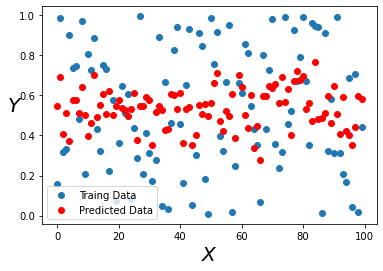

In [8]:
#Plotting the Y values and the Y predicted values

plt.scatter(range(len(X)),Y, label="Traing Data")
plt.scatter(range(len(X)),Y_predicted,color="red", label="Predicted Data")
#plt.plot(range(len(X)),Y_predicted,color="green", label="Linear Regression Line")
plt.legend()
plt.xlabel("$X$", fontsize=20)
plt.ylabel("$Y$", rotation=0, fontsize=20)

plt.show()


References

https://www.youtube.com/watch?v=_1Ue-BASy8Q
http://www.math-cs.gordon.edu/courses/ma342/handouts/gauss.pdf.

